In [1]:
# Create a model that can predict the profit based on its features .
# Use appropriate evaluation metrics.The  Dataset can be downloaded from kaggle.com Dataset : 50_startups.csv

# Multiple Linear Regression - Predict Startup Profit


In [20]:
# Import Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Step 1: Load dataset
data = pd.read_csv("50_Startups.csv")

In [6]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [11]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
# Step 2: Encode categorical variable 'State'
data = pd.get_dummies(data, drop_first=True)

In [13]:
# Step 3: Features and target
X = data.drop("Profit", axis=1)   # Independent variables
y = data["Profit"]                # Target variable


In [14]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# Step 5: Train model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# Step 6: Predictions
y_pred = model.predict(X_test)


In [17]:
# Step 7: Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [18]:
print("\nModel Performance:")
print(f"R² Score       : {r2:.4f}")
print(f"Mean Absolute Error : {mae:.2f}")
print(f"Mean Squared Error  : {mse:.2f}")
print(f"Root MSE            : {rmse:.2f}")


Model Performance:
R² Score       : 0.8987
Mean Absolute Error : 6961.48
Mean Squared Error  : 82010363.04
Root MSE            : 9055.96


In [19]:
# Step 8: Coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coeff_df)


Feature Coefficients:
                 Coefficient
R&D Spend           0.805630
Administration     -0.068788
Marketing Spend     0.029855
State_Florida     938.793006
State_New York      6.987760


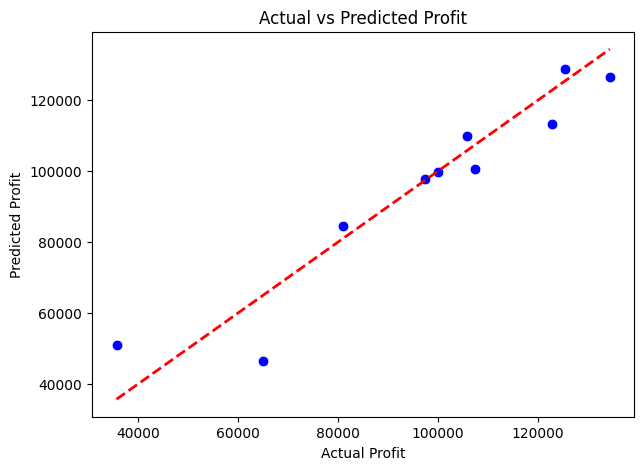

In [22]:
# 1. Actual vs Predicted Plot
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linestyle="--", linewidth=2)  # line of perfect prediction
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.show()

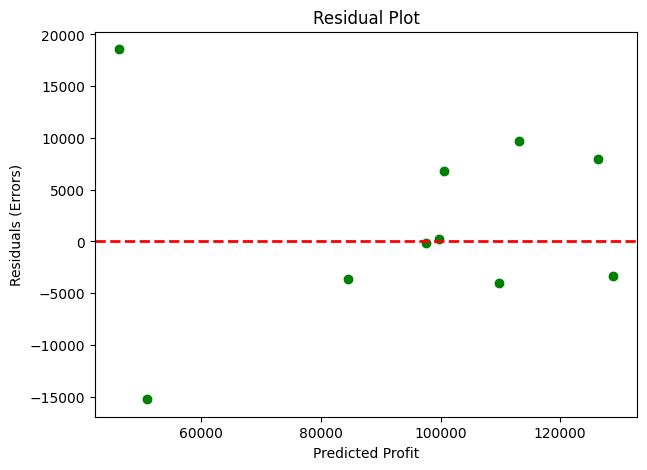

In [23]:
# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, color="green", s=60)
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()

/var/folders/2w/tr51yf8d3h11k47fg6pznx9c0000gn/T/ipykernel_12228/1597370314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coeff_df['Coefficient'], y=coeff_df.index, palette="viridis")


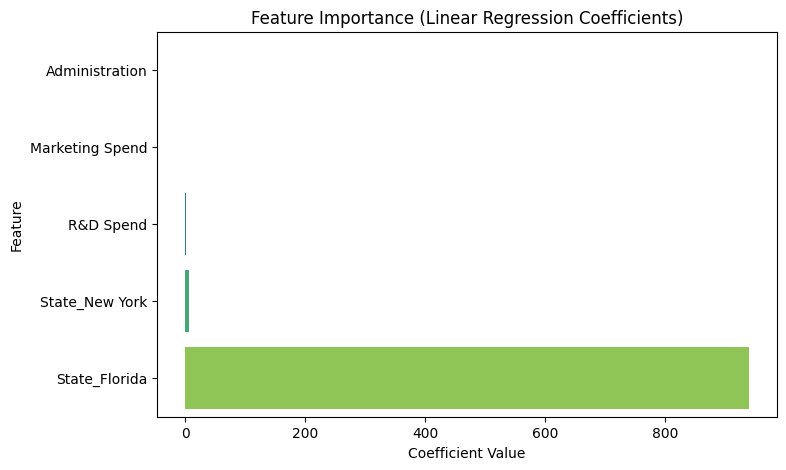

In [24]:
# 3. Feature Importance (Coefficients)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']).sort_values(by="Coefficient")
plt.figure(figsize=(8,5))
sns.barplot(x=coeff_df['Coefficient'], y=coeff_df.index, palette="viridis")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()